# Convolutional Neural Network - Conjunto MNIST
Neste exemplo utilizaremos uma rede convolucional no dataset [MNIST](http://yann.lecun.com/exdb/mnist/). Esse dataset contém 70000 digitos (de 0 a 9) escritos a mão, separados em 60000 casos de treino e 10000 casos de teste. As imagens possuem dimensão (28x28).



---

## Importando bibliotecas

In [1]:
from __future__ import absolute_import, division, print_function, unicode_literals

# Install TensorFlow
try:
  # %tensorflow_version only exists in Colab.
  %tensorflow_version 2.x
except Exception:
  pass

import tensorflow as tf

import datetime, os

import io
from google.colab import files
from skimage.io import imread
import numpy as np
from skimage.io import imread
from matplotlib import pyplot as plt



---

## Carregando dataset e escalando os valores de X entre 0 e 1

Carregando o dataset e escalando os valores dos dados entre 0 e 1. A função `load_data()` da já nos fornece os dados separados em treino e teste, porém ainda é necessário escalá-los entre o intervalo 0 e 1. Como os valores estão em escala de cinza, os valores estão entre 0 e 255. Dessa forma, para que eles fiquem entre 0 e 1 basta dividir os valores por 255.

In [2]:
mnist = tf.keras.datasets.mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0


11501568/11490434 [==============================] - 0s 0us/step




---

## Analisando dados carregados e adicionando uma dimensão de "canal"
Nessa etapa adicionamos uma dimensão channel (canal) no conjunto de dados para podermos utilizar as funções de convolução da biblioteca `tensorflow`

In [3]:
print(x_train.shape)
print(y_train.shape)
# print(y_train[:10])

# Add a channels dimension
x_train = x_train[..., tf.newaxis]
x_test = x_test[..., tf.newaxis]

print(x_train.shape)
print(y_train.shape)

(60000, 28, 28)
(60000,)
(60000, 28, 28, 1)
(60000,)


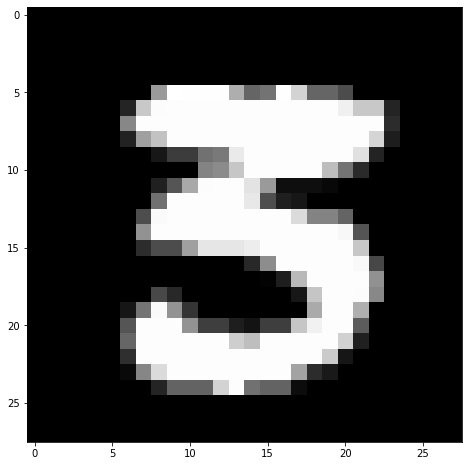

In [6]:
# Visualizando o exemplo de nro 2200
fig = plt.figure(figsize=(8, 8))

plt.grid(False)
plt.imshow(x_train[2200, :, :, 0], cmap='gray')

In [7]:
print(y_train[:10])

[5 0 4 1 9 2 1 3 1 4]




---

## Treinando o modelo e exibindo sua acurácia nos conjuntos de treino/teste
O modelo treinado nesta etapa é um modelo convolucional simples, com 1 camada convolucional, 1 camada escondida com 128 neurônios e uma camada de saída com 10 neurônios (1 para cada classe). As "camadas" `Flatten()` e `Dropout()` na verdade representam uma operação, e não uma camada propriamente dita

In [8]:
model = tf.keras.models.Sequential([
  tf.keras.layers.Conv2D(filters=32, kernel_size=3, input_shape=(28,28, 1), activation='relu'),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(128, activation='relu'),  
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Dense(10, activation='softmax')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 flatten (Flatten)           (None, 21632)             0         
                                                                 
 dense (Dense)               (None, 128)               2769024   
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                                 
 dense_1 (Dense)             (None, 10)                1290      
                                                                 
Total params: 2,770,634
Trainable params: 2,770,634
Non-trainable params: 0
_________________________________________________________________


In [9]:
model.fit(x_train, y_train, epochs=5)

model.evaluate(x_test, y_test)

Epoch 1/5
1875/1875 [==============================] - 16s 3ms/step - loss: 0.1653 - accuracy: 0.9500
Epoch 2/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0590 - accuracy: 0.9819
Epoch 3/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0372 - accuracy: 0.9876
Epoch 4/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0252 - accuracy: 0.9919
Epoch 5/5
313/313 [==============================] - 1s 3ms/step - loss: 0.0541 - accuracy: 0.9843


[0.05406803637742996, 0.9843000173568726]



---

## Testando com imagem própria

Crie uma imagem com 28x28 pixels e teste o modelo treinado. A imagem deve possuir fundo preto e o número deve estar em branco. Compile a célula abaixo para habilitar o botão de upload (em caso de erro, recompile a célula)

In [13]:
uploaded = files.upload()
file_name = next(iter(uploaded))
file_bin = uploaded[file_name]

query = imread(io.BytesIO(file_bin), as_gray=True)
query_predict = model(query.reshape(1, 28,28, 1))
print("O numero é: %d" % np.argmax(query_predict))
print(np.round(query_predict, 2))

Saving minisc.png to minisc (3).png
O numero é: 2
[[0.   0.01 0.52 0.15 0.   0.   0.31 0.01 0.   0.  ]]




---

## Teste outras configurações
Varie a configuração das camadas bem como seus parâmetros para o modelo acima e verifique o impacto na acurácia para o conjunto de teste. Utilize, caso queira, a ferramenta `Tensorboard`